In [ ]:
import numpy as np
import pandas as pd

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [ ]:
# tf.keras에서 fashion_mnist 데이터 다운로드
from tensorflow.keras.datasets import fashion_mnist

# 전체 7만개 데이터 중, 6만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# image size는 28x28의 grayscale 2차원 데이터, label은 1차원
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

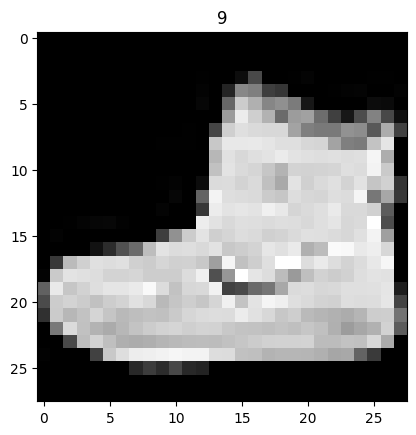

In [ ]:
# 첫번째 이미지 데이터 출력
# print(train_images[0])

import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
# 첫번째 이미지 데이터의 label 출력


### MNIST image array 시각화

In [ ]:
# matplotlib 라이브러리로 train 이미지의 첫번째 데이터 출력


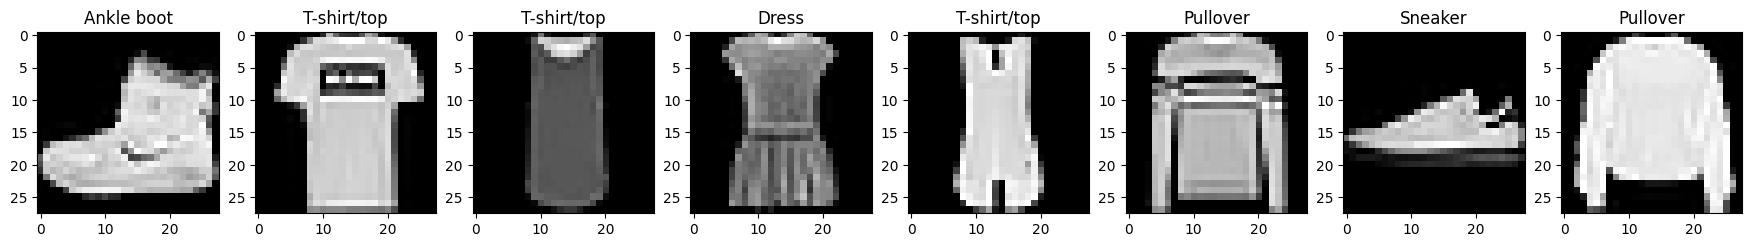

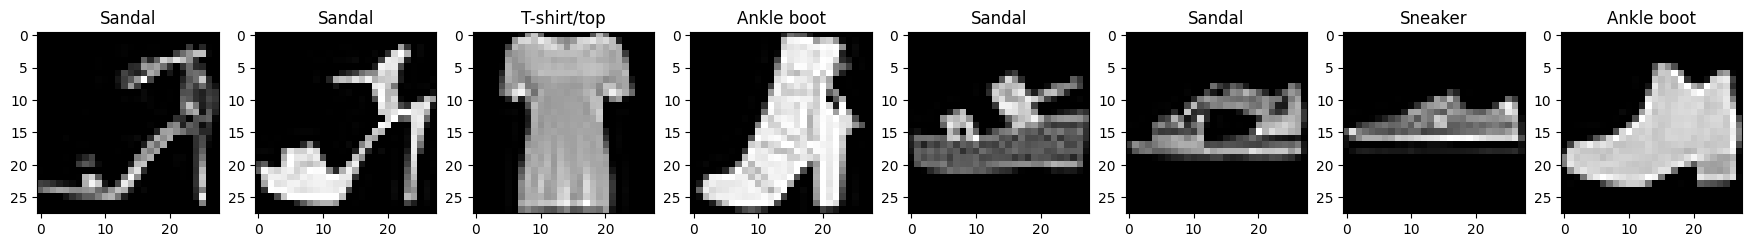

In [ ]:
# 8개의 subplot으로 이미지 출력
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환
* array type은 float 32로 변환

In [ ]:
import numpy as np

# 데이터 전처리 함수
def data_preprocess(images, labels):

    # 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형
    images = np.array(images/255.0, dtype=np.float32)

    # 이미지 label을 float32 형 변형
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
# 훈련용, 테스트용 데이터에 전처리 적용
train_images, train_labels = data_preprocess(train_images, train_labels)
test_images, test_labels = data_preprocess(test_images, test_labels)

In [ ]:
# 전처리 결과 확인
print(train_images, train_labels)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [9. 0. 0. 

In [ ]:
# categorical_crossentropy를 사용하기 위해 반드시 Label을 원핫인코딩 필요
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

# 기존 label과 인코딩 된 label shape 비교
print(train_labels.shape, test_labels.shape)
print(train_oh_labels.shape, test_oh_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


### Dense Layer를 기반으로 모델을 생성

In [ ]:
# 이미지 크기에 해당하는 상수 생성
INPUT_SIZE = 28

In [ ]:
# Flatten, 3개의 Dense(relu, relu, softmax) 층 쌓기
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu', name='first'),
    Dense(30, activation='relu', name='second'),
    Dense(10, activation='softmax', name='third')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 first (Dense)               (None, 100)               78500     
                                                                 
 second (Dense)              (None, 30)                3030      
                                                                 
 third (Dense)               (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 모델의 Loss와 Optimizer를 설정하고 학습 수행


In [ ]:
# optimizer는 Adam으로 설정, loss는 categorical_crossentropy로, 평가지표는 accuracyf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 6만개의 28*28 이미지로 모델을 학습하고, 학습 이력을 저장
history = model.fit(
    train_images, train_oh_labels, batch_size=32, epochs=20, verbose=1
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5550 - accuracy: 0.8008
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4406 - accuracy: 0.8433
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4183 - accuracy: 0.8518
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4067 - accuracy: 0.8566
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8614
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3883 - accuracy: 0.8614
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8663
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3732 - accuracy: 0.8680
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3677 - accuracy: 0.8697
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.360

In [ ]:
# history 객체 안에 history 딕셔너리 확인 - 'loss'
for i in history.history['loss']:
  print(i)

0.5550111532211304
0.440595418214798
0.4182567596435547
0.4066668748855591
0.39438727498054504
0.3882542848587036
0.375103622674942
0.37317797541618347
0.3676642179489136
0.36050641536712646
0.36690112948417664
0.36266404390335083
0.3584822118282318
0.35101979970932007
0.34502625465393066
0.35310012102127075
0.3444158434867859
0.34954455494880676
0.3548141419887543
0.3326075077056885


In [ ]:
# history 객체 안에 history 딕셔너리 확인 - 'accuracy'
for i in history.history['accuracy']:
  print(i)

0.80076664686203
0.8433499932289124
0.8518166542053223
0.8565999865531921
0.861383318901062
0.8614166378974915
0.8663333058357239
0.8680333495140076
0.8697333335876465
0.873033344745636
0.8705499768257141
0.8728166818618774
0.8746166825294495
0.8764166831970215
0.8797833323478699
0.8781333565711975
0.8794166445732117
0.879016637802124
0.8776999711990356
0.8825500011444092


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함.
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [ ]:
# 10,000개의 test 이미지로 예측
pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred[0]

array([3.0295617e-19, 9.4388746e-16, 0.0000000e+00, 1.2710967e-19,
       4.6345282e-21, 2.1684323e-02, 5.2192121e-07, 6.4725084e-03,
       5.2843723e-07, 9.7184205e-01], dtype=float32)

In [ ]:
# 0번 클래스일 확률 ~ 9번 클래스일 확률


###한 개의 이미지만 확인해보자###

- 2차원 이미지를 바로 predict에 넣으면 오류 발생 가능!

- 모델은 학습(fit)할때 3차원 피쳐를 입력받음(train_images)
- 예측(predict)도 3차원 데이터(test_images)

In [ ]:
# 2차원 데이터를 3차원으로(임의로 차원 추가, axis에 따라 어디에 차원을 추가할지 결정)
np.expand_dims(test_images[0], axis=0).shape
np.expand_dims(test_images[1], axis=0).shape
np.expand_dims(test_images[2], axis=0).shape

(1, 28, 28)

In [ ]:
# 첫번째 test 이미지 예측 결과 확인
pred_0 = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_0)

1/1 [==============================] - 0s 18ms/step
softmax output: [[3.0295617e-19 9.4388746e-16 0.0000000e+00 1.2710967e-19 4.6345282e-21
  2.1684323e-02 5.2192121e-07 6.4725084e-03 5.2843717e-07 9.7184205e-01]]


In [ ]:
# 첫번째 test 이미지의 클래스 확인
# numpy.squeeze : 차원을 하나 늘렸으니 줄이기
# numpy.argmax : 배열(array)에서 최댓값의 인덱스를 반환

pred_0_class = np.argmax(np.squeeze(pred_0))
print('predicted class value:', pred_0_class)

predicted class value: 0


In [ ]:
# 실제 값과 예측 값 확인
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0])
print('predicted class value:', pred_0_class)

target class value: 9.0
predicted class value: 0


### 테스트 데이터 세트로 모델 성능 검증

In [ ]:
# 테스트 데이터로 모델 평가(batch_size는 64)
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8595


[0.4410327076911926, 0.859499990940094]